# Counting translated titles

In [1]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(stringr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  3.0.4     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
title_akas=read.delim("./../dataset/cleaned_filtered_title_akas.tsv",header=TRUE)

In [3]:
head(title_akas)

titleId,region,isOriginalTitle
tt0000001,UA,0
tt0000001,DE,0
tt0000001,HU,0
tt0000001,GR,0
tt0000001,RU,0
tt0000001,US,0


In [4]:
ids = table(title_akas$titleId)

In [5]:
ids = as.data.frame(ids)
ids$type = "Title"

In [6]:
summary(ids)

        Var1             Freq            type          
 tt0000001:     1   Min.   : 1.000   Length:907879     
 tt0000002:     1   1st Qu.: 1.000   Class :character  
 tt0000003:     1   Median : 1.000   Mode  :character  
 tt0000004:     1   Mean   : 2.105                     
 tt0000005:     1   3rd Qu.: 2.000                     
 tt0000006:     1   Max.   :78.000                     
 (Other)  :907873                                      

In [7]:
ones = nrow(ids[ids$Freq==1,])/nrow(ids)
ones

[1] 0.7476139

In [8]:
plus_ones = 1-ones

In [9]:
ones = round(ones,digits=2)
plus_ones =  round(plus_ones,digits=2)

In [10]:
pie_chart_data = data.frame(group=c("1",">1"),value=c(ones,plus_ones))

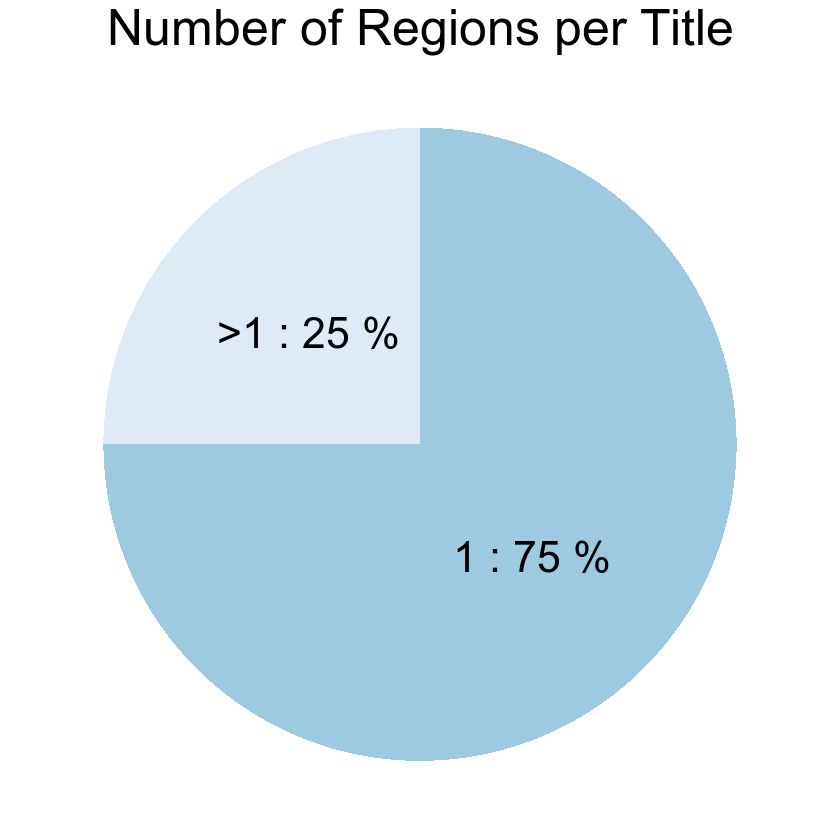

In [11]:
ggplot(pie_chart_data, aes(x="", y=value, fill=group)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) + 
  theme_void()+
  theme(legend.position="none",plot.title=element_text(hjust=0.5,size=30)) +
  geom_text(aes(label = paste(group,":", value*100,"%")), position=position_stack(vjust=0.5), color = "black", size=9) + 
  scale_fill_brewer(palette="Blues") +
  labs(title="Number of Regions per Title")

In [15]:
ids_menor_1 = ids[ids$Freq<2,]
ids_maior_1 = ids[ids$Freq>=2,]

In [16]:
summary(ids_menor_1)

        Var1             Freq       type          
 tt0000019:     1   Min.   :1   Length:678743     
 tt0000025:     1   1st Qu.:1   Class :character  
 tt0000038:     1   Median :1   Mode  :character  
 tt0000039:     1   Mean   :1                     
 tt0000043:     1   3rd Qu.:1                     
 tt0000044:     1   Max.   :1                     
 (Other)  :678737                                 

In [17]:
summary(ids_maior_1)

        Var1             Freq            type          
 tt0000001:     1   Min.   : 2.000   Length:229136     
 tt0000002:     1   1st Qu.: 2.000   Class :character  
 tt0000003:     1   Median : 3.000   Mode  :character  
 tt0000004:     1   Mean   : 5.379                     
 tt0000005:     1   3rd Qu.: 5.000                     
 tt0000006:     1   Max.   :78.000                     
 (Other)  :229130                                      

In [18]:
require(scales)

Loading required package: scales

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



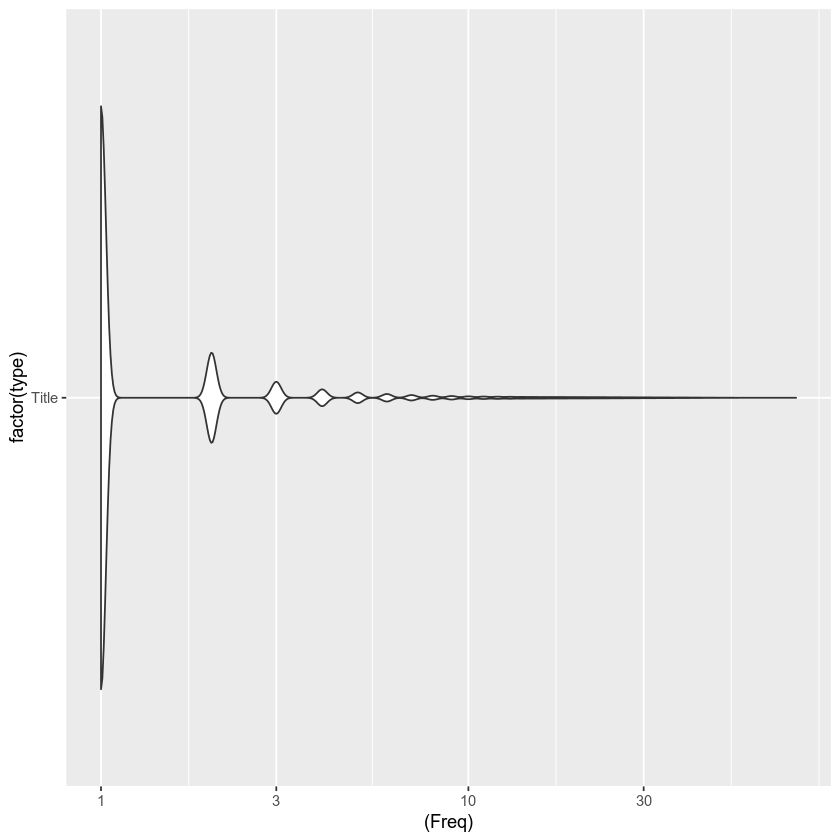

In [19]:
ggplot(ids,aes(x=factor(type),y=(Freq)))+
  geom_violin()+ 
  scale_y_log10()+
  coord_flip() 

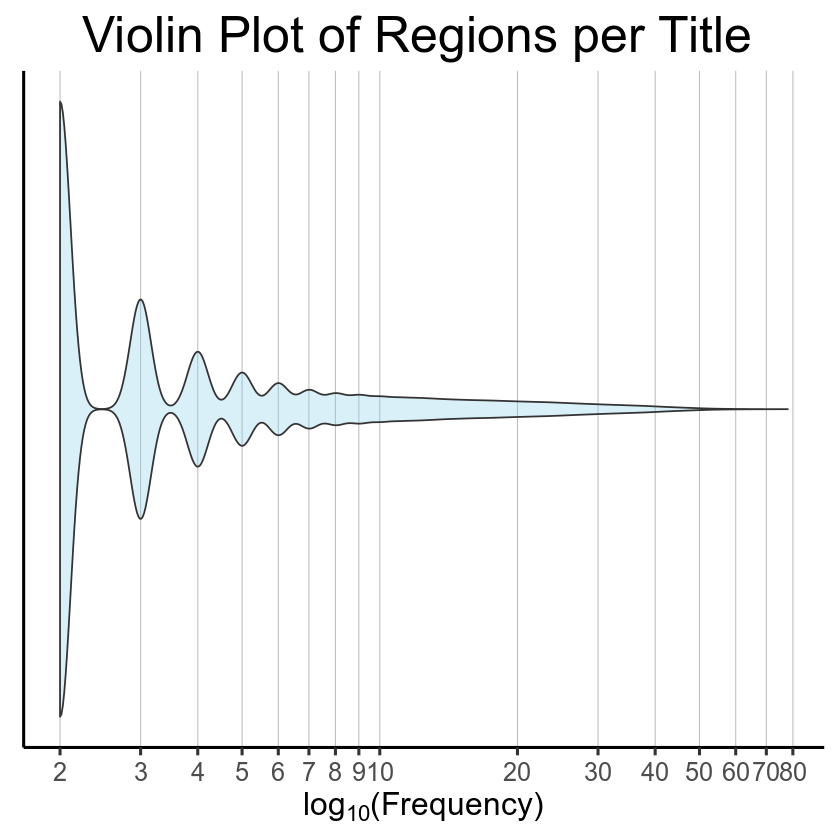

In [22]:
ggplot(ids_maior_1,aes(x=(Freq),y=(Freq)))+
  geom_violin(fill="skyblue",alpha=0.3)+ 
  scale_y_log10(breaks=c(0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80))+
  theme_classic(base_size = 19)+
  coord_flip()+
  theme(axis.title.y=element_blank(),axis.text.y=element_blank(),panel.grid.major.x=element_line(colour="gray",size=0.3),
        axis.ticks.y=element_blank(),legend.position="none",plot.title=element_text(hjust=0.5,size=30)) +
  labs(y=expression("log"[10]*"(Frequency)"),x="",title="Violin Plot of Regions per Title ")